# Chapter 1. Radiometry: Homework

## Problem 1. Basic mathematics
**(a)** Prove that the differential solid angle measure is $\sin\theta\mathrm d \theta\mathrm d\phi$

(Please provide more precise solution than *the ratio of infinitesiamlly areas on the sphere and plane is...*, is possible.)

**Answer:** *Your answer here.*

**(b)** Represent the solid angle of a surface $\mathcal S \subset \R^3$ viewed at $p\in \R^3$ as a area integral.

(Hint. You can assign a parameterization $\varphi\colon U\subset \R^2 \to \mathcal S$ and assume $U = \left[u_1,u_2\right]\times \left[v_1,v_2\right]$ for simplicity.)

**Answer:** *Your answer here.*

**(c)**
$$
\begin{bmatrix} \mathbf{M_1} & \mathbf{t_1} \\
\mathbf 0 & 1 \end{bmatrix}
\begin{bmatrix} \mathbf{M_2} & \mathbf{t_2} \\
\mathbf 0 & 1 \end{bmatrix}
=?
$$
$$
\left(\begin{bmatrix} \mathbf{M} & \mathbf{t} \\
\mathbf 0 & 1 \end{bmatrix}\right)^{-1}
=?
$$
Furthermore, find all rigid body transforms which are the inverses of themselves.

**Answer:** *Your answer here.*

**(d)** *(area of $\mathbf T\mathcal S$ is optional)* Suppose that there is a affine transformation $\mathbf T = \begin{bmatrix} \mathbf{M} & \mathbf{t} \\ \mathbf 0 & 1 \end{bmatrix}$, written in homogeneous coordinates, where $\mathbf M \in \R^{3\times 3}$ and $\mathbf t \in \R^{3\times 1}$. We have a volume $\mathcal V \subset \R^3$ and a surface $\mathcal S \subset \R^3$. What is the volume and are of $\mathbf T \mathcal V$ and $\mathbf T\mathcal S$, respectively? Here, $\mathbf T A \coloneqq \left\{ \mathbf{T} p \in \R^3 \vert p \in A \right\}$ for an arbitrary subset $A\subset \R^3$.

**Answer:** *Your answer here.*

**(e)** *(Optional)* Rusinkiewicz coordinates $\left(\theta_h,\phi_h,\theta_d,\phi_d\right)\in\left[0, \pi\right]\times\left[0, 2\pi\right]\times\left[0,\frac\pi2\right]\times\left[0, 2\pi\right]$ parameterizes $S^2\times S^2$ as:
$$
\omega_i = R_z\left(\phi_h\right)R_y\left(\theta_h\right)R_z\left(\phi_d\right)R_y\left(\phi_d\right)\hat z, \\
\omega_o = R_z\left(\phi_h\right)R_y\left(\theta_h\right)R_z\left(\phi_d\right)R_y\left(-\phi_d\right)\hat z,
$$
where $\left(\omega_i,\omega_o\right)$ denotes an arbitrary point in $S^2\times S^2$. Wrtie the differential measure of double product of solid angle measures in Rusinkiewicz coordinates, i.e., find a function $J_\text{Rus}\left(\theta_h,\phi_h,\theta_d,\phi_d\right)$ such that:
$$
\int_{S^2}{\!\int_{S^2}{\!f\left(\omega_i,\omega_o\right) \sin \theta_i\mathrm d \theta_i\mathrm d\phi_i}\sin \theta_o\mathrm d\theta_o\mathrm d\phi_o} = \int_0^{2\pi}{\!\int_0^{\frac\pi2}{{\!\int_0^{2\pi}{\!\int_0^\pi{\!f\left(\theta_h,\phi_h,\theta_d,\phi_d\right)J_\text{Rus}\left(\theta_h,\phi_h,\theta_d,\phi_d\right)\mathrm d\theta_h}\mathrm d\phi_h}}\mathrm d\theta_d}\mathrm d \phi_d}.
$$

**Answer:** *Your answer here.*

In [1]:
#--- [Block 1: Initialize]
import os, util
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
import mitsuba as mi

mi.set_variant('cuda_ad_rgb', 'llvm_ad_rgb')
print(f"{mi.variant() = }")

mi.variant() = 'cuda_ad_rgb'


## Problem 2. Sequence of area sources converging to a point source
`mi.cornell_box()` returns a dictionary which describes the *Cornell Box* scene, as Lines 561-695 in: https://github.com/mitsuba-renderer/mitsuba3/blob/master/src/python/python/util.py Refer to Mitusba plugin reference (https://mitsuba.readthedocs.io/en/stable/src/plugin_reference.html) for how scenes can be described.

We have three types of light source, an area light on a sphere (Scene A) with center $p_l$ and radius $r$, an area light on a disk (Scene B) with center $p_l'$, radius $r$, and normal $-\hat y$, and a point light (Scene C) with position $p_l$. The emitted radiance on area lights in Scenes A and B are $L_A$ and $L_B$, respectively (constant for position and direction), and the radiant intensity of the point light in Scene C is $I$ (contant for direction). Ignoring indirect illumination (`scene_dict['integrator']['max_depth'] = 2`), the rendered image for each scene is shown below.

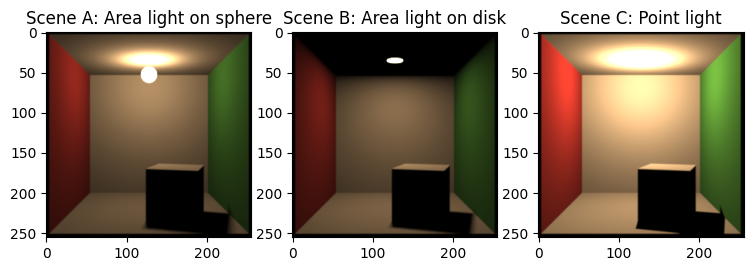

In [2]:
#--- [Block 2: Render or load GT image]
def scene_hw1_common() -> dict:
    scene_dict = mi.cornell_box()
    # scene_dict.pop('small-box')
    scene_dict.pop('large-box')
    scene_dict['integrator']['max_depth'] = 2 # Direct illumination only
    return scene_dict
    
def scene_hw1_p2A(center: ArrayLike,
                  radius: float,
                  radiance: ArrayLike
                 ) -> mi.Scene:
    scene_dict = scene_hw1_common()
    # Replace Line
    scene_dict['light'] = {
        'type': 'sphere',
        'center': center,
        'radius': radius,
        'emitter': scene_dict['light']['emitter']
    }
    scene_dict['light']['emitter']['radiance']['value'] = radiance
    
    scene = mi.load_dict(scene_dict)
    return scene

def scene_hw1_p2B(center: ArrayLike,
                  radius: float,
                  radiance: ArrayLike
                 ) -> mi.Scene:
    scene_dict = scene_hw1_common()
    # Replace Line
    scene_dict['light'] = {
        'type': 'disk',
        'to_world': mi.ScalarTransform4f().translate(center)
                                          .rotate([1, 0, 0], 90)
                                          .scale([radius, radius, 1.0]),
        'emitter': scene_dict['light']['emitter']
    }
    scene_dict['light']['emitter']['radiance']['value'] = radiance
    
    scene = mi.load_dict(scene_dict)
    return scene

def scene_hw1_p2C(position: ArrayLike,
                  intensity: ArrayLike
                 ) -> mi.Scene:
    scene_dict = scene_hw1_common()
    # Replace Line
    scene_dict['light'] = {
        'type': 'point',
        'position': position,
        'intensity': {'type': 'rgb', 'value': intensity}
    }
    
    scene = mi.load_dict(scene_dict)
    return scene
   
sphere_center = np.array([0, 0.8, 0.01])
disk_center = np.array([0.0, 0.99, 0.01])
radius = 0.1
light_radianceA = np.array([18.387  , 13.9873 ,  6.75357]) * 3
light_radianceB = np.array([18.387  , 13.9873 ,  6.75357]) * 5
light_intensity = np.array([18.387  , 13.9873 ,  6.75357]) / 3

sceneA = scene_hw1_p2A(sphere_center, radius, light_radianceA)
sceneB = scene_hw1_p2B(disk_center, radius, light_radianceB)
sceneC = scene_hw1_p2C(sphere_center, light_intensity)
gt_file = os.path.join("..", "gt_rendered", "hw1_sphere.npy")
    
spp = 256
scenes = [sceneA, sceneB, sceneC]
scene_labels = ["Scene A: Area light on sphere", "Scene B: Area light on disk", "Scene C: Point light"]
gt_imgs = []
fig, axes = plt.subplots(1, 3, figsize=(9,3))

for ax, scene, label in zip(axes, scenes, scene_labels):
    img = mi.render(scene, spp=spp)
    gt_imgs.append(img)
    ax.imshow(util.scale_gamma(img))
    ax.set_title(label)
plt.show()

**(a)** Suppose that there is a squence of area lights on spheres with radii $r_n = \frac {r_1} n $ and constant emitting radiance $L_n$, where $n$ is the index in the sequence. To make the sequence converge to a point source with radiant intensity $I$, What should be $L_n$? Also implement your answer into Code Block 3.

**Answer:** *Your answer*

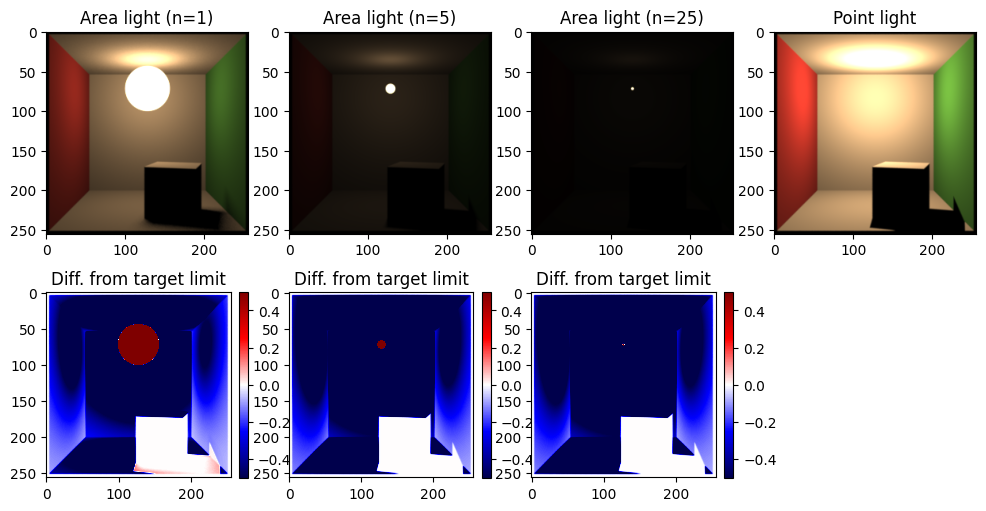

In [3]:
#--- [Block 3: Task - Problem 3 (a) validation] 
''' Your code here '''
def L_n(radius_1: float, I: float, n: int) -> float:
    return I # place holder
''' Your code end'''

sphere_center_P2 = np.array([0, 0.6, 0.01])
radius_1 = 0.3
light_intensity = np.array([18.387  , 13.9873 ,  6.75357]) / 3

scene_limit = scene_hw1_p2C(sphere_center_P2, light_intensity)
def scene_n(n: int):
    radius_n = radius_1 / n
    return scene_hw1_p2A(sphere_center_P2, radius_n, L_n(radius_1, light_intensity, n))

plt.figure(figsize=(12,6))
util.test_sequence(scene_n, scene_limit, "Area light (n=%d)", "Point light", opt_diff={'vmin': -0.5, 'vmax': 0.5})
# plt.imshow(mi.render(scene_n(100), spp=4096))

**(b)** *(Optional)* Can you also obtain a point light by taking limit of a sequence of area lights on disks? If so, introduce an appropriate sequence of radii and constant radiance and to which radiant intensity the sequence converges. Then can you construct such a point light using existing plugins in the current version of Mitsuba 3?

(Currently existing plugins: https://mitsuba.readthedocs.io/en/stable/src/generated/plugins_emitters.html)

**Answer:** *Your answer here.*

## Problem 3. Direct illuminations

**Question** Write the exitant radiance at an arbitrary point $p$ on scene surfaces along direction $\omega$. Assume that the scene only contains diffuse materials, as seen the above code block, and denote the diffuse albedo and the surface normal at $p$ by $\rho$ and $\hat n$, respectively. In addition, implement your answer in Code Block 5.

For derivation, you can assume sizes of area lights are sufficiently small and there is no indirect illumination and shadow. For implementation, you can uses `numpy.ndarray` variables computed in Code Block 4.

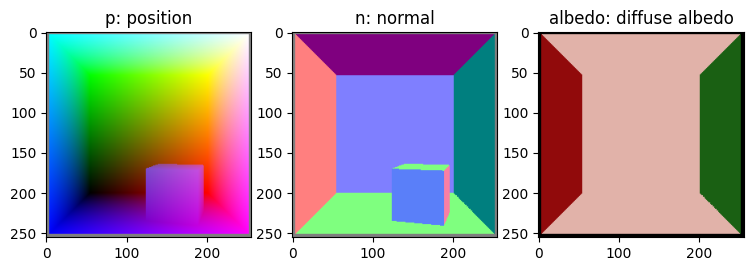

sphere_center = array([0.  , 0.8 , 0.01]) for Scenes A and C
disk_center = array([0.  , 0.99, 0.01]) for Scene B
radius = 0.1 for Scenes A and B
light_radianceA = array([55.161  , 41.9619 , 20.26071]) for Scene A
light_radianceB = array([91.935  , 69.9365 , 33.76785]) for Scene B
light_intensity = array([6.129     , 4.66243333, 2.25119   ]) for Scene C
disk_normal = array([ 0, -1,  0]) for Scenes B


In [4]:
#--- [Block 4: Show the GT image and some variables]

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
# Subplot 1: positions
si = util.primary_sis(sceneC)
h, w = 256, 256
p = si.p.numpy().T.reshape(h, w, 3) # $p$
axes[0].imshow(util.scale_vec2unit(p))
axes[0].set_title("p: position")

# Subplot 2: normals
n = si.n.numpy().T.reshape(h, w, 3) # $\hat n$
axes[1].imshow(util.scale_vec2unit(n))
axes[1].set_title("n: normal")

# Subplot 3: diffuse albedoes
albedo = si.bsdf().eval_diffuse_reflectance(si).numpy().T.reshape(h, w, 3) # $\rho$
axes[2].imshow(albedo)
axes[2].set_title("albedo: diffuse albedo")
plt.show()

# Print: the centor of the light source
print(f"{sphere_center = } for Scenes A and C") # $p_l$
print(f"{disk_center = } for Scene B") # $p_l'$
print(f"{radius = } for Scenes A and B") # $r$
print(f"{light_radianceA = } for Scene A") # $L_A$
print(f"{light_radianceB = } for Scene B") # $L_B$
print(f"{light_intensity = } for Scene C") # $I$

disk_normal = np.array([0, -1, 0])
print(f"{disk_normal = } for Scenes B")

**Answer:** *Your answer here.*

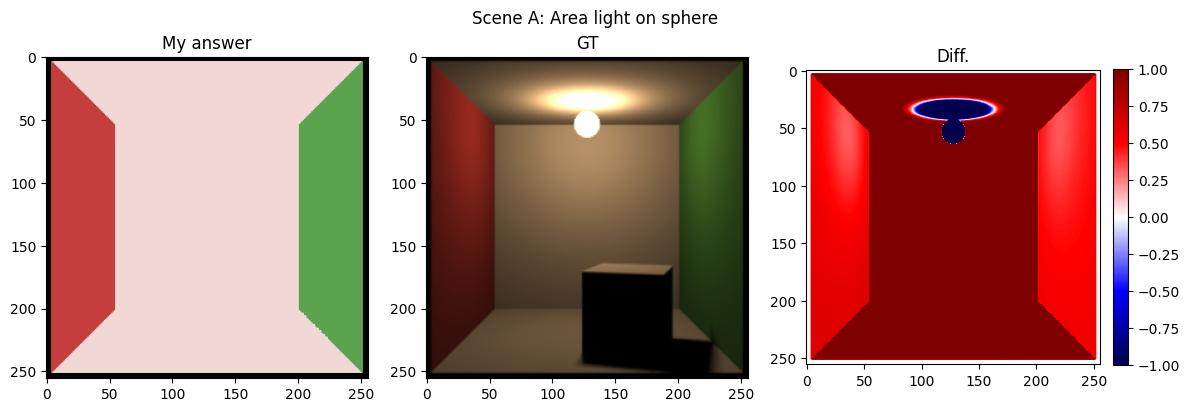

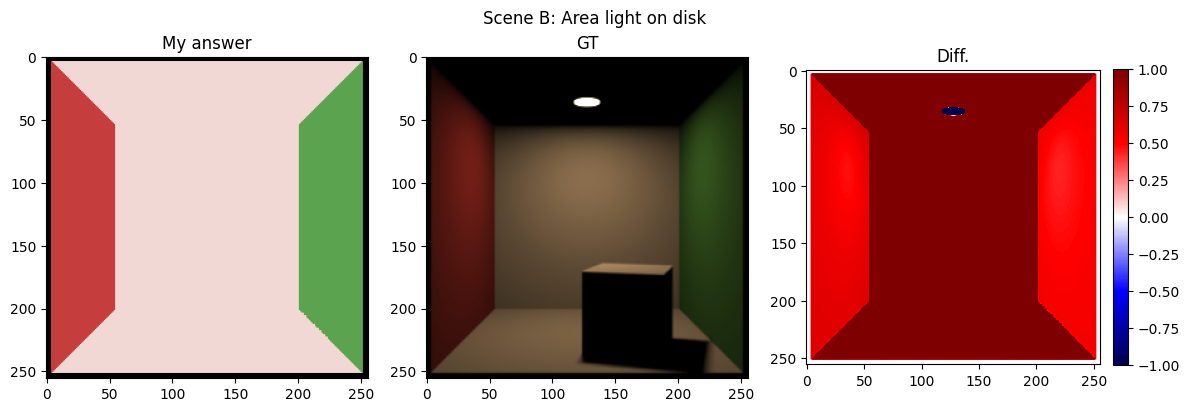

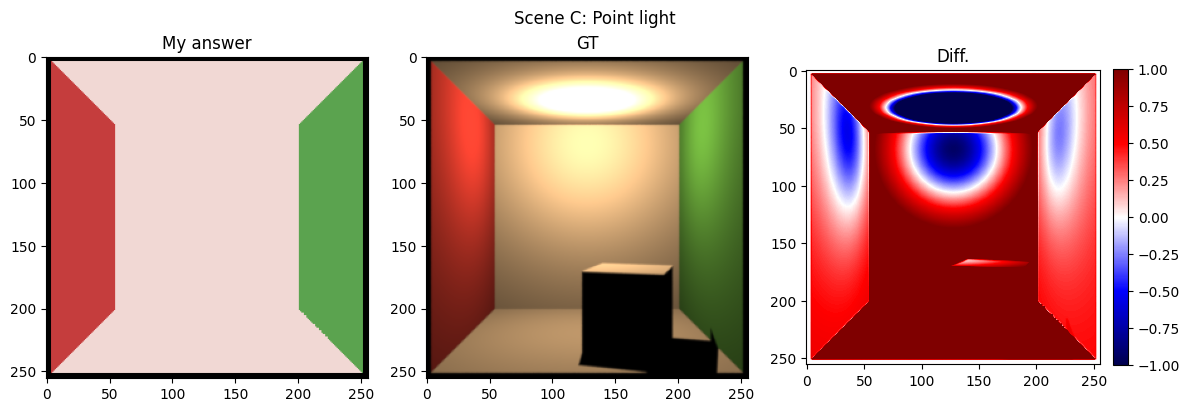

In [5]:
#--- [Block 5: Task - Problem 2 validation]
''' Your code here '''
answerA = albedo # Place holders
answerB = albedo
answerC = albedo
''' Your code end '''
answers = [answerA, answerB, answerC]

# Show results
for answer, gt_img, title in zip(answers, gt_imgs, scene_labels):    
    util.imshow_compare(answer, gt_img, vabs=1,
                        figsize=(12,4), suptitle=title)
    plt.show();

## Problem 4. Simple indirect illuminations

Suppose that there is a scene which consists of the following objects:
* a disk at the center $c=\left(0, 1, 0\right)$, radius $r=1$, normal $\hat n_1=\left(0,-1,0\right)$, and diffuse albedo $\rho_1$
* a surface which contains a point $p=\left(0,-1,0\right)$, at which normal and diffuse albedo are $\hat n_2=\left(0,1,0\right)$ and $\rho_2$, respectively.
* point light source at the origin $o=\left(0,0,0\right)$ with intensity $I$

Note that a perspective camera is designed to capture *radiance* at the center of camera along each direction of pixel.
The rendered image of this scene is shown below.

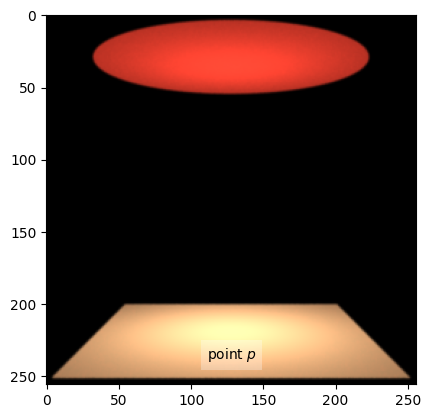

Pixel indices of the point p is (219, 128)
Pixel intensity at the point p is [1.8345965 1.0408127 0.4792884]


In [6]:
#--- [Block 6: Scene and target pixel for Problem 4]
def scene_hw1_p4(center: ArrayLike,
                 radius: float,
                 light_position: ArrayLike,
                 intensity: ArrayLike
                ) -> mi.Scene:
    scene_dict = mi.cornell_box()
    for obj_name in ['small-box', 'large-box', 'red-wall', 'green-wall', 'back']:
        scene_dict.pop(obj_name)
    scene_dict['integrator']['max_depth'] = 3 # Up to second bounce indirect illumination
    scene_dict['ceiling'] = {
        'type': 'disk',
        'to_world': mi.ScalarTransform4f().translate(center)
                                          .rotate([1, 0, 0], 90)
                                          .scale([radius, radius, 1]),
        'bsdf': {'type': 'ref', 'id':  'red'}
    }
    scene_dict['light'] = {
        'type': 'point',
        'position': light_position,
        'intensity': {'type': 'rgb', 'value': intensity}
    }
    scene = mi.load_dict(scene_dict)
    return scene

# Parameters
center = np.array([0, 1, 0]) # $c$
radius = 1 # $r$
light_position = np.array([0, 0, 0]) # $o$
# Reuse `light_intensity` from Code Block 2, as $I$

# Render
scene = scene_hw1_p4(center, radius, light_position, light_intensity)
spp = 128#1024
gt_img = mi.render(scene, spp=spp)
plt.imshow(util.scale_gamma(gt_img))

# Target position
p = np.array([0, -1, 0]) # $p$
pix_id = util.world2img(scene, p)
util.text_at(scene, p, "point $p$")
plt.show()
pix_y, pix_x = pix_id.y[0], pix_id.x[0]
color_p = gt_img.numpy()[pix_y, pix_x, :]
print(f"Pixel indices of the point p is {(pix_y, pix_x)}")
print(f"Pixel intensity at the point p is {color_p}")

In [7]:
#--- [Block 7: Variables for Problem 4]
n1 = np.array([0, -1, 0]) # $\hat n_1$ # $\hat n_1$
n2 = np.array([0, 1, 0]) # $\hat n_1$# $\hat n_2$
rho1 = np.array(mi.cornell_box()['red']['reflectance']['value']) # $\rho_1$
rho2 = np.array(mi.cornell_box()['white']['reflectance']['value']) # $\rho_2$
print(f"{rho1 = }")
print(f"{rho2 = }")

rho1 = array([0.570068 , 0.0430135, 0.0443706])
rho2 = array([0.885809, 0.698859, 0.666422])


**Question:** Find the outgoing radiance at $p$ with ragarding up to the second bounce indirect illumination, and also implement your answer in Code Block 8 to validate.

**Answer:** *Your answer here.*

In [8]:
#--- [Block 8: Task - Problem 4]
''' Your code here '''
L_at_p = 0 # place holder
''' Your code end'''

print(f"My answer: {L_at_p = }")
print(f"GT: {color_p}")
Diff = L_at_p - color_p
print(f"Diff.: {Diff} with rms {np.sqrt(sum(Diff**2))}")

My answer: L_at_p = 0
GT: [1.8345965 1.0408127 0.4792884]
Diff.: [-1.8345965 -1.0408127 -0.4792884] with rms 2.163042509792612


## Problem 5. Scale and physical dimensions
We can scale a scene by $\times k$ as implemented in `util.scale_scene_dict`. Then all distance between each vertex (including camera center) and the origin of the coordinate system become $\times k$ larger. Suppose that we have Scene A which has two light sources: an area light on a rectangle and a point light, as seen in the following code block.

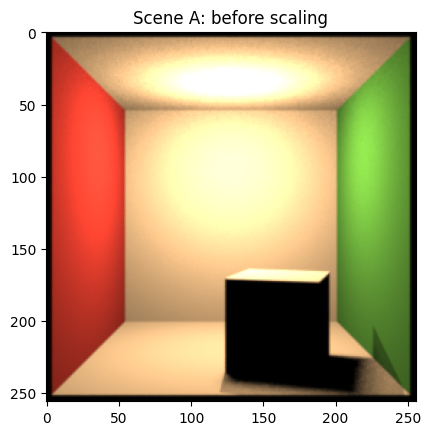

In [9]:
#--- [Block 9: Define scenes for Problem 5]
def scene_hw1_p5A(radiance: ArrayLike,
                  position: ArrayLike,
                  intensity: ArrayLike
                 ) -> mi.Scene:
    scene_dict = scene_hw1_common()
    scene_dict['light']['emitter']['radiance']['value'] = radiance
    scene_dict['point-light'] = {
        'type': 'point',
        'position': position,
        'intensity': {'type': 'rgb', 'value': intensity}
    }
    scene = mi.load_dict(scene_dict)
    return scene

def scene_hw1_p5B(radiance: ArrayLike,
                  position: ArrayLike,
                  intensity: ArrayLike,
                  factor: float
                 ) -> mi.Scene:
    scene_dict = scene_hw1_common()
    scene_dict['light']['emitter']['radiance']['value'] = radiance
    scene_dict['point-light'] = {
        'type': 'point',
        'position': position,
        'intensity': {'type': 'rgb', 'value': intensity}
    }
    scene_dict = util.scale_scene_dict(scene_dict, factor)
    scene = mi.load_dict(scene_dict)
    return scene

position = np.array([0, 0.5, 0])
sceneA = scene_hw1_p5A(light_radianceA, position, light_intensity)
spp = 256
imgA = mi.render(sceneA, spp=spp).numpy()
plt.imshow(util.scale_gamma(imgA))
plt.title("Scene A: before scaling")
plt.show()

**Question:** When we define Scene B as the scene obtained by scaling Scene A by $\times k$. To get the same rendered image of Scene B as A, how the emitting radiance and radiant intensity of the area light and the point light, respectively, should be modified?

**Answer:** *Your answer*

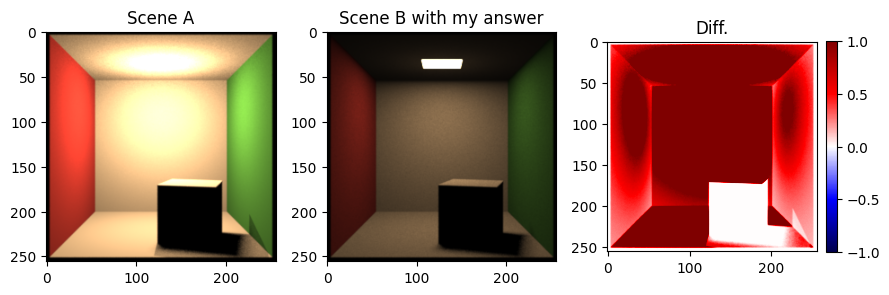

In [10]:
#--- [Block 10: Task - Problem 5]
factor = 10 # $k$
''' Your code here '''
light_radiance_scaled = light_radianceA * 0.3 # placeholder
light_intensity_scaled = light_intensity * 0.3 # placeholder
''' Your code end '''

sceneB = scene_hw1_p5B(light_radiance_scaled, position, light_intensity_scaled, factor)

imgB = mi.render(sceneB, spp=spp).numpy()
util.imshow_compare(imgA, imgB, title_img="Scene A", title_ref="Scene B with my answer", vabs=1,
                    figsize=(9, 3))
plt.show()